# Assignment Python 3
Nama : Putu Wahyu Kusuma Wardhana <br>
Program : Python For Data Science <br>
Batch : 5

## A. Research Goal
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## B. Deskripsi Dataset
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## C. Exploratory Data Analysis
Tahap ini dilakukan untuk membantu mendeteksi kesalahan atau error, mengidentifikasi outlier dalam kumpulan data, memahami hubungan antar data, menggali faktor-faktor penting, dan menemukan pola dalam data. 

### Import Library

In [63]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

### Load Dataset

In [64]:
df = pd.read_csv('dataset/bank.csv', sep=';')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [65]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [66]:
print ("DataFrame Dimensions : ")
df.shape

DataFrame Dimensions : 


(4521, 17)

### Info Dataset

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Dataset terdiri dari 17 kolom, yang mana terdapat 7 kolom bertipe int dan 10 kolom bertipe object.

### Descriptive Statistics

In [68]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Missing Values

In [69]:
print("Cek Missing Values : ")
print(df.isnull().sum())

Cek Missing Values : 
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Dataset ini tidak memiliki missing values.

### Encoding Nominal Data
Kita akan mengubah yes = 1 dan no = 0 pada kolom "y"

In [70]:
df['y'] = df.y.replace({"yes": 1, "no": 0})

In [71]:
# iterated through df and stored data with datatype as 'object' to new variable cat_col
cat_col = [n for n in df.columns if df[n].dtypes == 'object']

In [72]:
df.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,0
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,0
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,0
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,0
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,0


### Visualization

% no subcription:  88.47600088476001
% subcription:  11.523999115239992


<AxesSubplot:>

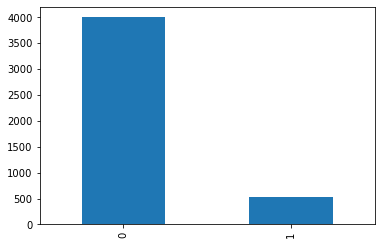

In [73]:
all_row = len(df)
no_sub = len(df[df['y'] == 0])
sub = len(df[df['y']==1])
percentage_no_sub = (no_sub/all_row) * 100
percentage_sub = (sub/all_row) * 100

print('% no subcription: ', percentage_no_sub)
print('% subcription: ', percentage_sub)
my_color = 'rg'
df['y'].value_counts().plot(kind='bar')

Dari plot di atas, kita dapat melihat mayoritas orang tidak berlangganan yaitu sebesar 88%.

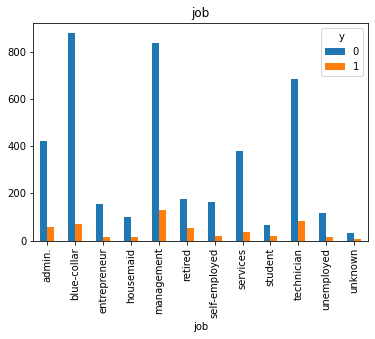

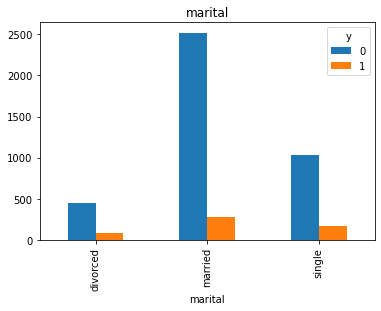

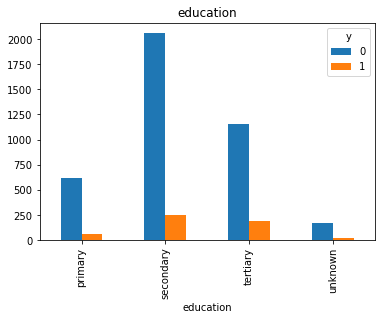

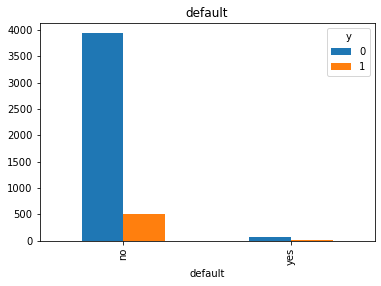

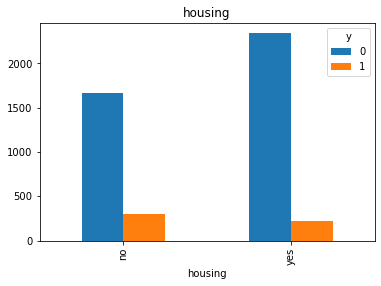

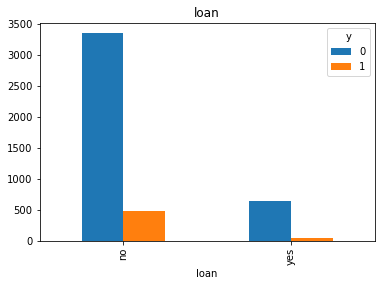

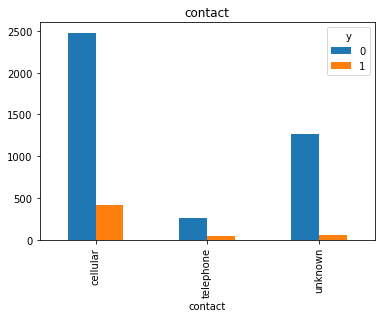

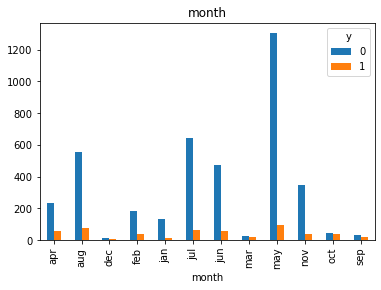

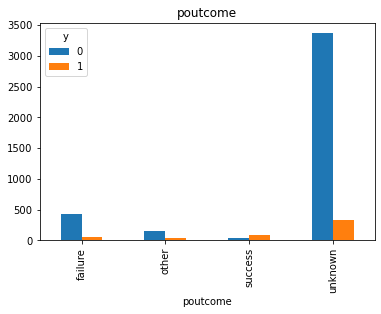

In [74]:
#Visualization from our categorical datas top see if we can get insigts from there
for col in cat_col:
    pd.crosstab(df[col], df.y).plot(kind = 'bar')
    plt.title(col)

Plot diatas menunjukan persebaran orang yang berlanggan atau tidak berdasarkan kolom job, marital, education, housing, loan, contact, month,  dan poutcome.

### Encoding Nominal Data (Again)

In [75]:
df['contact'].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [76]:
# replace contact with value
df['contact'] = df.contact.replace({"cellular": 1, "unknown": 0,"telephone":2})

### Drop Column and One Hot Encoding

In [77]:
df = pd.get_dummies(df,columns=['job','marital','education','default','housing','loan','month','poutcome'],drop_first = True)

In [78]:
df.head()

,age,balance,contact,day,duration,campaign,pdays,previous,y,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,1,19,79,1,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,1,11,220,1,339,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,1,16,185,1,330,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,0,3,199,4,-1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,0,5,226,1,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


## D. Pre-Processing
Pada tahap ini akan dilakukan pemisahan atau split dataset terhadap dataset. Pemisahan ini dilakukan agar mempermudah untuk tahap modelling.

### Split Dataset

In [79]:
from sklearn.model_selection import train_test_split

X=df.loc[:,df.columns != 'y']
y=df.loc[:,df.columns == 'y']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('x train ',len(x_train))
print('x test ',len(x_test))
print('y train ',len(y_train))
print('y test ',len(y_test))

x train  3616
x test  905
y train  3616
y test  905


Kode diatas merupakan pemisahan terhadap dataset, yang mana X berisi semua kolom kecuali "y" dan y berisi kolom "y" saja. Selanjutnya, X dan y akan dibuat menjadi data train dan data test dengan persentase sebesar 80% train dan 20% test.

## E. Modelling
Tahap ini akan menerapkan metode Machine Learning untuk penentuan terhadap teknik data mining, alat bantu data mining, dan algoritma data mining yang akan diterapkan. Untuk dataset ini akan dilakukan modeling yang dengan algoritma classification.

### 1. LOGISTIC REGRESSION

In [80]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

C:\Users\WAHYU\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(solver='liblinear')

In [81]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_test)
print(accuracy_score(y_test, pred))

0.9237569060773481


In [82]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, pred)
print(matrix)

[[802   8]
 [ 61  34]]


### 2. K-NEAREST NEIGHBOR (kNN)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier()
kNN.fit(x_train,y_train)

C:\Users\WAHYU\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier()

In [84]:
pred_knn = kNN.predict(x_test)
akurasi_knn = accuracy_score(y_test, pred_knn)
print("Accuracy Score : ",akurasi_knn)

Accuracy Score :  0.8928176795580111


In [85]:
matrix1 = confusion_matrix(y_test, pred_knn)
print(matrix1)

[[788  22]
 [ 75  20]]


### 3. NAIVE BAYES

In [86]:
from sklearn.naive_bayes import GaussianNB 

nb = GaussianNB()
nb.fit(x_train,y_train)

C:\Users\WAHYU\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [87]:
pred_nb = nb.predict(x_test)
print("Accuracy Score : ", accuracy_score(y_test, pred_nb)) 

Accuracy Score :  0.8740331491712707


In [88]:
matrix2 = confusion_matrix(y_test,pred_nb)
print(matrix2)

[[744  66]
 [ 48  47]]


### 4. DECISION TREE

In [89]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [90]:
pred_dt = dt.predict(x_test)
print("Accuracy Score : ", accuracy_score(y_test,pred_dt))

Accuracy Score :  0.8784530386740331


In [91]:
matrix3 = confusion_matrix(y_test, pred_dt)
print(matrix3)

[[752  58]
 [ 52  43]]


### 5. RANDOM FOREST

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

C:\Users\WAHYU\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier()

In [93]:
pred_rf = rf.predict(x_test)
print("Accuracy Score : ", accuracy_score(y_test,pred_rf))

Accuracy Score :  0.9193370165745857


In [94]:
matrix4 = confusion_matrix(y_test, pred_rf)
print(matrix4)

[[806   4]
 [ 69  26]]


### 6. SUPPORT VECTOR MACHINE (SVM) 

In [95]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(x_train,y_train)

C:\Users\WAHYU\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [96]:
pred_svm = svm_model.predict(x_test)
print(accuracy_score(y_test,pred_svm))

0.8950276243093923


In [97]:
matrix5 = confusion_matrix(y_test,pred_svm)
print(matrix5)

[[810   0]
 [ 95   0]]


## Overall Analysis

In [98]:
print("Logistic Regression:", accuracy_score(y_test, pred))
print("Random Forest:", accuracy_score(y_test, pred_rf))
print("SVM:", accuracy_score(y_test, pred_svm))
print("KNN:", accuracy_score(y_test, pred_knn))
print("Naive Bayes:", accuracy_score(y_test, pred_nb))
print("Decision Tree:", accuracy_score(y_test, pred_dt))

Logistic Regression: 0.9237569060773481
Random Forest: 0.9193370165745857
SVM: 0.8950276243093923
KNN: 0.8928176795580111
Naive Bayes: 0.8740331491712707
Decision Tree: 0.8784530386740331


Berdasarkan hasil akurasi diatas, maka algoritma yang cocok untuk klasifikasi sehingga dapat memprediksi apakah klien akan berlangganan atau tidak yaitu Logistic Regression, Random Forest dan SVM. Ketiga algoritma ini dipilih karena sangat baik dalam menangani dataset yang berhubungan dengan klasifikasi atau kategorikal. 